# KNN(K nearest neighbors) Algorithm in scratch

In [8]:
# KNN Algorithm

import numpy as np
from collections import Counter

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    
    def __init__(self, k=3):
        self.k = k
        
    # given data
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    # predict
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
        
    def _predict(self, x):
        # compute distances
        distances = [euclidean_distance(x,x_train) for x_train in X_train]
        
        # k nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        #majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [11]:
# test

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X = iris_data.data
y = iris_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print(accuracy)

0.98


# KNN using Sckit-Learn module

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris_data = load_iris()
X = iris_data.data
y = iris_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.98


# Feedback

/var/folders/x9/j16jbch57gg61qsn4q91b06w0000gn/T/ipykernel_40641/3246500284.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  d1 = np.random.multivariate_normal(mean=[0,2], cov=[[2,-5],[-5,3]], size=100) #negative correlated


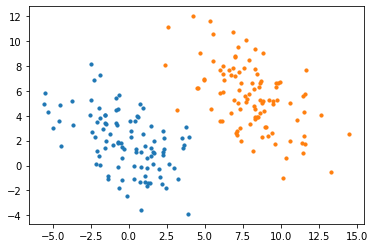

classification-1


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)
d1 = np.random.multivariate_normal(mean=[0,2], cov=[[2,-5],[-5,3]], size=100) #negative correlated
d2 = np.random.multivariate_normal(mean=[8,6], cov=[[5,-3],[-3,8]], size=100) #negative correlated

f1 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.scatter(d1[:,0],d1[:,1],s=10)
ax1.scatter(d2[:,0],d2[:,1],s=10)
plt.show()

Ndata = len(d1[:,0])
X1 = np.c_[d1[:,0],d1[:,1]]
y1 = np.zeros([Ndata,1])
X2 = np.c_[d2[:,0],d2[:,1]]
y2 = np.ones([Ndata,1])
X = np.r_[X1, X2]
y = np.r_[y1, y2]

#KNN-binary classification
data = np.array([5,5]) # I want to predict a data but what if we want to predict lots of data??
distance = []
for i in range(len(y)):
    dis = (X[i][0] - data[0])**2 + (X[i][1] - data[1])**2
    # instead we can make euclidean_distance function using numpy
    distance.append(dis)

y_dis = pd.DataFrame(np.c_[y,distance])
y_dis.columns = ["cluster", "distance"]
y_dis_sorted = y_dis.sort_values(by=["distance"])
# instead we can use numpy.argsort to get sorted indices

#k = 5
clustered = y_dis_sorted.iloc[:5]["cluster"]
class0 = 0
class1 = 0
for i in clustered:
    if i == 0:
        class0 += 1
    elif i == 1:
        class1 += 1
if class0 > class1:
    print("classification-0")
else:
    print("classification-1")